# Use ML to Predict Customer Churn

The dataset used in this project consist of over 7000 records and 38 features. The data is raw and will require cleaning. The goal of this project is to create a model that can predict customer churn based off of these features. I will be using a Logistic Regression model and a Random Forest model for this project. At the end, I will compare the results for each and assess which is more suited for this task.

In [946]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [947]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [948]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [949]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

# Feature Engineering

1. Some columns are redundant or don't provide useful information for analysis so I will remove them from the dataset.
2. I will transform categorical features to "dummies" to help with ML analysis. 
3. The "telecom_data_dictionary" CSV file indicates that features that do not apply to certain rows are handled. For example, when feature "Internet Service" is labeled as "No" then features such as "Streaming Movies" are also labeled "No". However, upon review of the data, this is not the case. Instead, these values appear as NaN. To prevent this from affecting the results of the model these NaN values will need to be handled. 

The following features will be kept for further analysis:

Gender, Age, Marriage, Number of Dependents, Zip Code, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Streaming TV, Streaming Movies, Streaming MUsic, Unlimited Data, Contract, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status, Churn Category

In [950]:
telecom = df.loc[:,[
    'Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 
    'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
    'Total Long Distance Charges', 'Total Revenue', 'Customer Status' 
    ]]

telecom.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,Yes,One Year,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,No,Month-to-Month,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Yes,Month-to-Month,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Yes,Month-to-Month,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Yes,Month-to-Month,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [951]:
print(telecom.describe())

               Age  Number of Dependents  Number of Referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        6361.000000   
mean          32.386767                          25.420517   
std           24.542061                          14.200374   
min            1.000000                           1.010000   
25%            9.000000                          13.050000   
50%           29.000000                   

Handle Nan values from customers who do not use internet

In [952]:
null_features = ['Multiple Lines', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', ]

for feature in null_features:   
    telecom[feature] = telecom[feature].fillna('No')

telecom['Avg Monthly GB Download'] = telecom['Avg Monthly GB Download'].fillna(0)
telecom['Avg Monthly Long Distance Charges'] = telecom['Avg Monthly Long Distance Charges'].fillna(0)


Now that NaN values in the categorical features are handled I will use Pandas "pd.get_dummies" function to get dummy variables for categorical features in the dataset

In [953]:
dummy_list_multiple = ['Offer', 'Internet Type', 'Contract','Payment Method', 'Customer Status']
dummy_list_binary = ['Gender' ,'Married', 'Phone Service', 'Internet Service','Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

telecom_dummies = pd.get_dummies(telecom, columns=dummy_list_multiple, drop_first=False)
telecom_dummies = pd.get_dummies(telecom_dummies, columns=dummy_list_binary, drop_first=True)

# print(telecom_dummies)
telecom_dummies.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Gender_Male,Married_Yes,Phone Service_Yes,Internet Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,0,1,1,1,0,1,1,0,0,1
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,1,0,1,1,1,1,0,1,1,0
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,1,0,1,1,0,1,0,0,0,1
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,1,1,1,1,0,1,1,1,0,1
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,0,1,1,1,0,1,1,0,0,1


In [954]:
telecom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Avg Monthly GB Download            7043 non-null   float64
 6   Monthly Charge                     7043 non-null   float64
 7   Total Charges                      7043 non-null   float64
 8   Total Refunds                      7043 non-null   float64
 9   Total Extra Data Charges           7043 non-null   int64  
 10  Total Long Distance Charges        7043 non-null   float64
 11  Total Revenue                      7043 non-null   float

# Import model and metric functions

In [955]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Pick Features and Create The Model

In [956]:
labels = telecom_dummies['Customer Status_Churned']

features = telecom_dummies[['Age', 'Married_Yes', 'Tenure in Months']]

In [957]:
training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=23) 

In [958]:
model1 = LogisticRegression(max_iter=400)
model1.fit(training_features, training_labels)
model1_score = model1.score(test_features, test_labels)
model1_score


0.7491717936583058

# Evaluate Model Performance

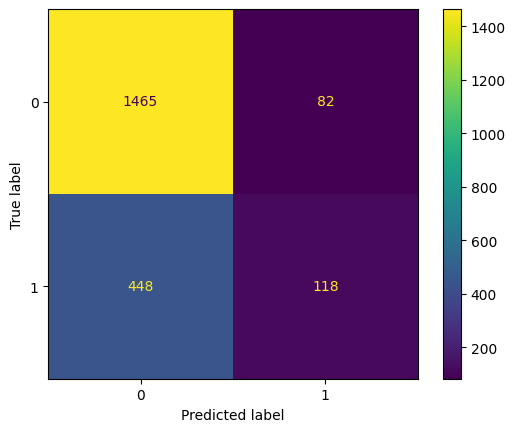

In [959]:
label_pred = model1.predict(test_features)

cm = confusion_matrix(test_labels, label_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

In [960]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1547
           1       0.59      0.21      0.31       566

    accuracy                           0.75      2113
   macro avg       0.68      0.58      0.58      2113
weighted avg       0.72      0.75      0.70      2113



In [961]:
accuracy = accuracy_score(test_labels, label_pred)
print(f'Accuracy Score: {accuracy}')

precision = precision_score(test_labels, label_pred)
print(f'Precision Score: {precision}')

recall = recall_score(test_labels, label_pred)
print(f'Recall Score: {recall}')

f1 = f1_score(test_labels, label_pred)
print(f'F1 Score: {f1}')

Accuracy Score: 0.7491717936583058
Precision Score: 0.59
Recall Score: 0.20848056537102475
F1 Score: 0.30809399477806787


Evaluate customer churn based on financial features

In [962]:
features = telecom_dummies[['Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']]

training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=23)

In [963]:
model2 = LogisticRegression(max_iter=150)
model2.fit(training_features, training_labels)
model2_score = model2.score(test_features, test_labels)
model2_score

0.7884524372929484

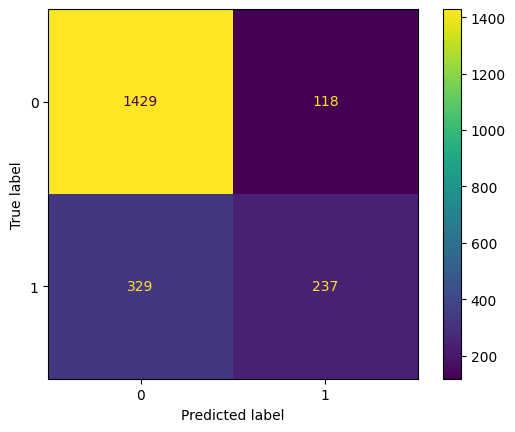

In [964]:
label_pred = model2.predict(test_features)

cm = confusion_matrix(test_labels, label_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()
plt.show()

In [965]:
print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1547
           1       0.67      0.42      0.51       566

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.77      0.79      0.77      2113



In [966]:
accuracy = accuracy_score(test_labels, label_pred)
print(f'Accuracy Score: {accuracy}')

precision = precision_score(test_labels, label_pred)
print(f'Precision Score: {precision}')

recall = recall_score(test_labels, label_pred)
print(f'Recall Score: {recall}')

f1 = f1_score(test_labels, label_pred)
print(f'F1 Score: {f1}')

Accuracy Score: 0.7884524372929484
Precision Score: 0.6676056338028169
Recall Score: 0.41872791519434627
F1 Score: 0.5146579804560261


Evaluate customer churn based on use of services and whether they purchased additional services

In [967]:
features = telecom_dummies[['Tenure in Months', 'Avg Monthly GB Download', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Phone Service_Yes',
 'Internet Service_Yes', 'Multiple Lines_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes', 'Unlimited Data_Yes']]

training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=23)

In [968]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
minmax_train_features = scaled.fit_transform(training_features)
minmax_test_features = scaled.fit_transform(test_features)

In [969]:
model3 = LogisticRegression()
model3.fit(minmax_train_features, training_labels)
model3_score = model3.score(minmax_test_features, test_labels)
model3_score

0.791292001893043

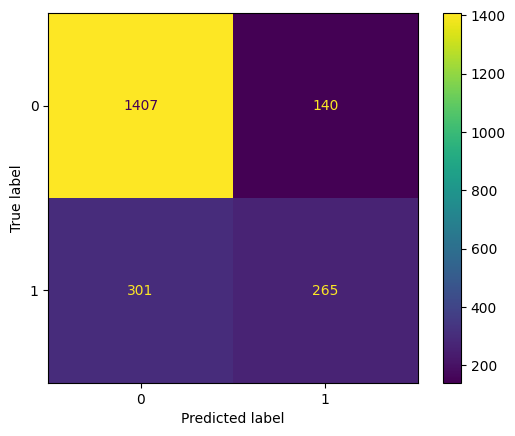

In [970]:
label_pred = model3.predict(minmax_test_features)

cm = confusion_matrix(test_labels, label_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot()
plt.show()

In [971]:
accuracy = accuracy_score(test_labels, label_pred)
print(f'Accuracy Score: {accuracy}')

precision = precision_score(test_labels, label_pred)
print(f'Precision Score: {precision}')

recall = recall_score(test_labels, label_pred)
print(f'Recall Score: {recall}')

f1 = f1_score(test_labels, label_pred)
print(f'F1 Score: {f1}')

Accuracy Score: 0.791292001893043
Precision Score: 0.654320987654321
Recall Score: 0.46819787985865724
F1 Score: 0.5458290422245108


In [972]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1547
           1       0.65      0.47      0.55       566

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# Random Forest Classifier


In [973]:
labels = telecom_dummies['Customer Status_Churned']

features = telecom_dummies[['Age', 'Married_Yes', 'Tenure in Months']]

training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3)

In [974]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators = 100, criterion='gini')
forest1.fit(training_features, training_labels)
forest1_score = forest1.score(test_features, test_labels)
forest1_score

0.7075248461902508

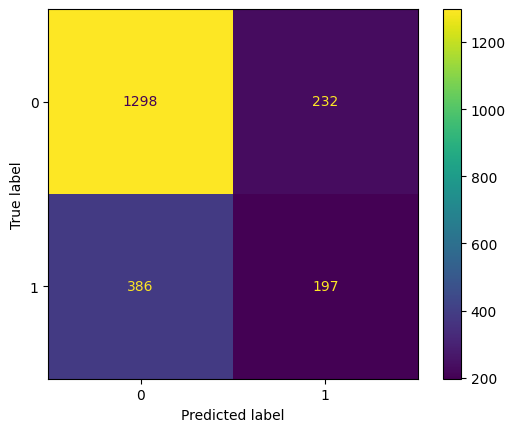

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1530
           1       0.46      0.34      0.39       583

    accuracy                           0.71      2113
   macro avg       0.61      0.59      0.60      2113
weighted avg       0.68      0.71      0.69      2113



In [975]:
label_pred = forest1.predict(test_features)

cm = confusion_matrix(test_labels, label_pred, labels=forest1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest1.classes_)
disp.plot()
plt.show()

print(classification_report(test_labels, label_pred))

Evaluate customer churn based on financial features

In [976]:
features = telecom_dummies[['Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']]

training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=23)

In [977]:
forest2 = RandomForestClassifier(n_estimators = 100, criterion='gini')
forest2.fit(training_features, training_labels)
forest2_score = forest2.score(test_features, test_labels)
forest2_score

0.7785139611926172

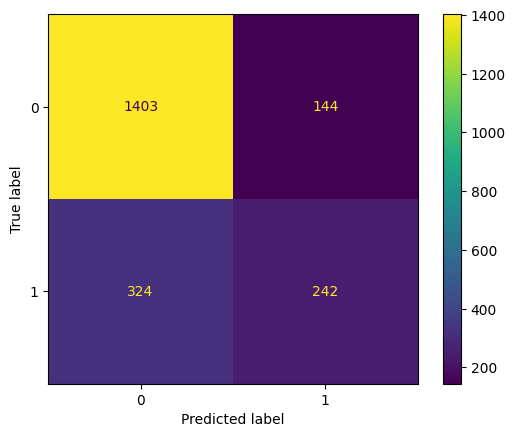

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1547
           1       0.63      0.43      0.51       566

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.68      2113
weighted avg       0.76      0.78      0.76      2113



In [978]:
label_pred = forest2.predict(test_features)

cm = confusion_matrix(test_labels, label_pred, labels=forest2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest2.classes_)
disp.plot()
plt.show()

print(classification_report(test_labels, label_pred))

Evaluate customer churn based on use of service and whether they purchased additional services

In [979]:
features = telecom_dummies[['Tenure in Months', 'Avg Monthly GB Download', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Phone Service_Yes',
 'Internet Service_Yes', 'Multiple Lines_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes', 'Unlimited Data_Yes']]

training_features, test_features, training_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=23)

In [980]:
scaled = MinMaxScaler()
minmax_train_features = scaled.fit_transform(training_features)
minmax_test_features = scaled.fit_transform(test_features)

In [981]:
forest3 = RandomForestClassifier(n_estimators = 100, criterion='gini')
forest3.fit(minmax_train_features, training_labels)
forest3_score = forest3.score(minmax_test_features, test_labels)
forest3_score

0.7733080927591103

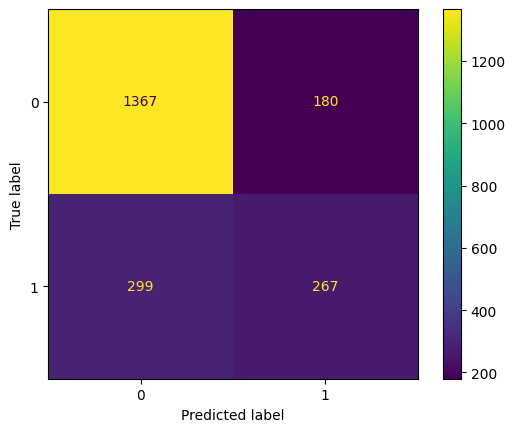

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1547
           1       0.60      0.47      0.53       566

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [982]:
label_pred = forest3.predict(minmax_test_features)

cm = confusion_matrix(test_labels, label_pred, labels=forest3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest3.classes_)
disp.plot()
plt.show()

print(classification_report(test_labels, label_pred))

# Conclusions

The two classification methods used for this analysis were Logistical Regression and Random Forest. The models were tested using 3 diffrent feature sets that contained both categorical and continuous data. The two methods yielded similar results but Logistical Regression slightly out performed the Random Forest Classifier. As you can see in the plot below, the Logistic Regression model achieved a max score of about 79% on the third feature set. Meanwhile, the Random Forest model achieved slightly less than a 78% max accuracy score on the 2nd feature set. This difference in accuracy is statistically insignificant. However, the performance of the Logistical Regression model is surprising because linearity between the features and the labels was not expected to be very high. 

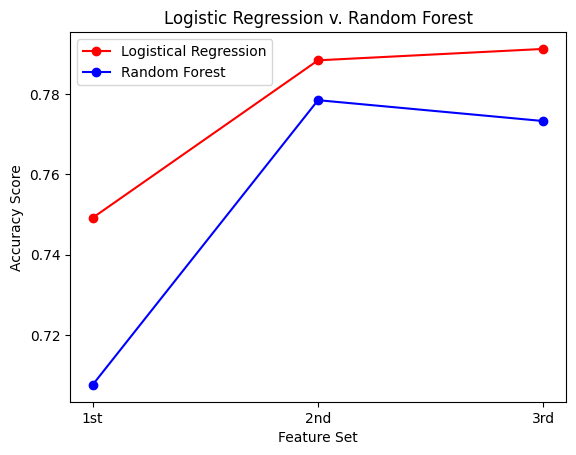

In [986]:
lr_accuracies = [model1_score, model2_score, model3_score]
rf_accuracies = [forest1_score, forest2_score, forest3_score]

x = [1,2,3]
labels = ['1st' , '2nd', '3rd']

fig, ax = plt.subplots()
fig.canvas.draw()

plt.plot(x, lr_accuracies, label='Logistical Regression', color='r', marker='o')
plt.plot(x, rf_accuracies, label='Random Forest', color='b', marker='o')
plt.legend()
plt.xticks(x, labels)
plt.title('Logistic Regression v. Random Forest')
plt.xlabel('Feature Set')
plt.ylabel('Accuracy Score')
plt.show()